# Isolation Forest

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Import Functions

In [2]:
import sys
sys.path.insert(0, '../../')

import src.functions as f

# Load Data

In [3]:
test, X_train, X_val, y_train, y_val = f.load_data()

# Starting Code

In [4]:
# Set the color palette
sns.set_palette('viridis')

# Convert anomaly labels to match clf.predict() output: normal data points are 1, anomalies are -1
y_val_converted = [-1 if i else 1 for i in y_val]

# Base Model

In [5]:
# Initialize the model
clf = IsolationForest(contamination=0.01, random_state=42)
clf.fit(X_train)
bm_pred = clf.predict(X_val)

## Evaluation

### Confusion Matrix

In [6]:
bm_cm = f.get_cm(bm_pred, y_val)
f.cm_inf(bm_cm, 'Base Model')

Confusion Matrix for model Base Model:

True Positives: 112845
True Negatives: 111
False Positives: 4131
False Negatives: 1021


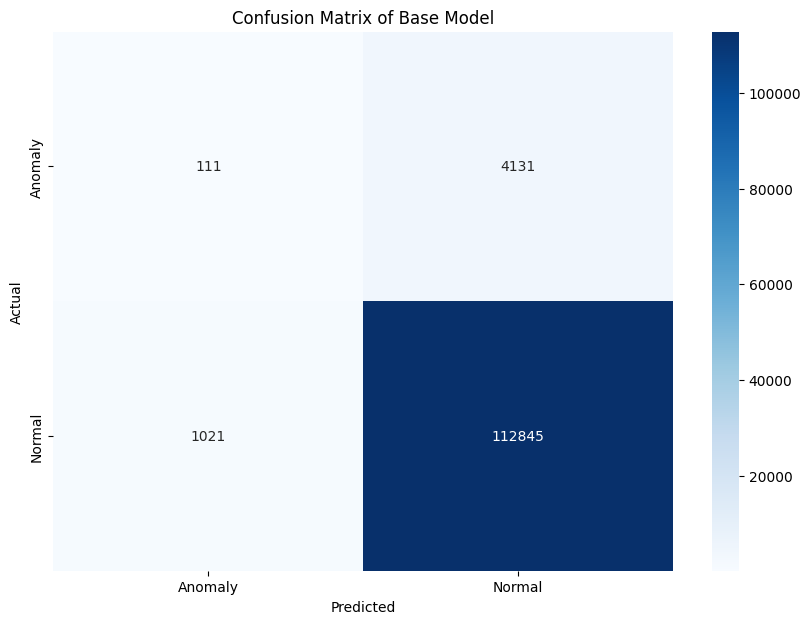

In [7]:
f.plot_cm(bm_cm, 'Base Model')

### Classification Report

In [8]:
# Print the classification report
print(classification_report(y_val_converted, bm_pred))

              precision    recall  f1-score   support

          -1       0.10      0.03      0.04      4242
           1       0.96      0.99      0.98    113866

    accuracy                           0.96    118108
   macro avg       0.53      0.51      0.51    118108
weighted avg       0.93      0.96      0.94    118108



### Metrics

In [9]:
bm_metrics = f.get_metrics(y_val_converted, bm_pred)
f.print_metrics(bm_metrics, 'Base Model')

Metrics of Base Model:

Precision: 0.9646850636027903
Recall: 0.9910333198672123
F1 Score: 0.9776817043692222
AUC-ROC: 0.5086001111358692


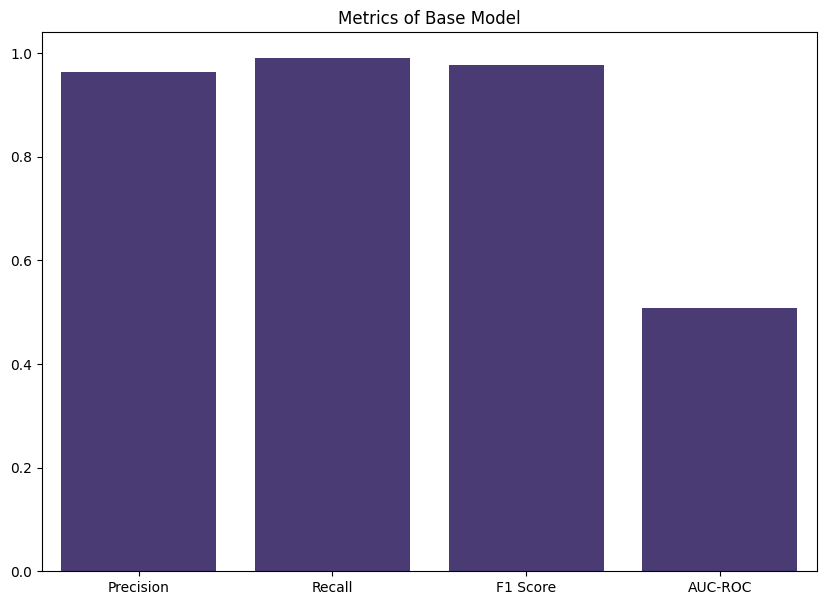

In [10]:
f.plot_metrics(bm_metrics, 'Base Model')

# Model 1

In [18]:
# Define the parameter grid
m1_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 128, 256],
    'contamination': [0.01, 0.05, 0.1]
}

# Fine tune the model
m1_best_params, m1_best_estimator = f.if_hypertune(m1_param_grid, X_train, y_train)

# Create model
m1 = IsolationForest(n_estimators=m1_best_params['n_estimators'],
                     max_samples=m1_best_params['max_samples'],
                     contamination=m1_best_params['contamination'],
                     random_state=42)

# Fit the model to your training data
m1.fit(X_train, y_train)
m1_pred = m1.predict(X_val)

Best parameters: {'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 100}
Best ROC AUC score: 0.49240577923469714


## Evaluation

### Confusion Matrix

In [19]:
m1_cm = f.get_cm(m1_pred, y_val)
f.cm_inf(m1_cm, 'Model 1')

Confusion Matrix for model Model 1:

True Positives: 112845
True Negatives: 111
False Positives: 4131
False Negatives: 1021


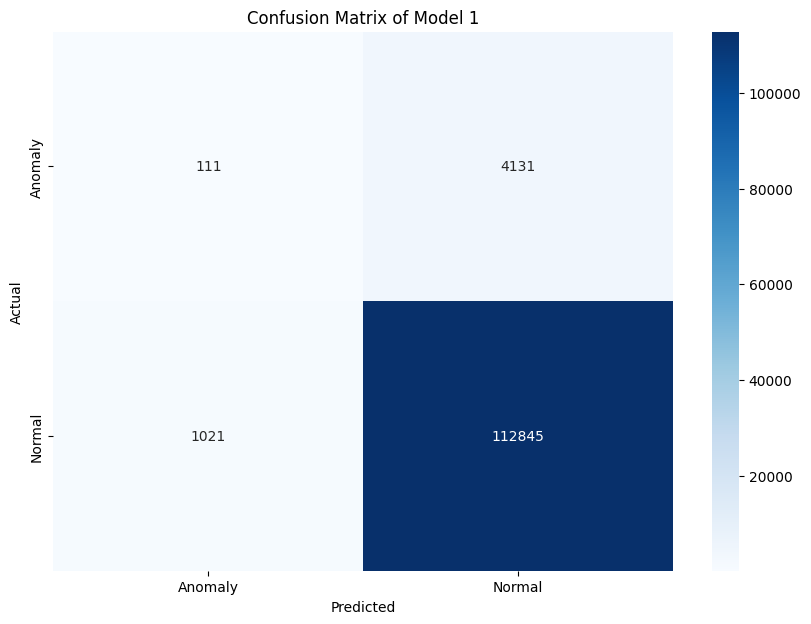

In [20]:
f.plot_cm(m1_cm, 'Model 1')

### Classification Report

In [21]:
# Print the classification report
print(classification_report(y_val_converted, m1_pred))

              precision    recall  f1-score   support

          -1       0.10      0.03      0.04      4242
           1       0.96      0.99      0.98    113866

    accuracy                           0.96    118108
   macro avg       0.53      0.51      0.51    118108
weighted avg       0.93      0.96      0.94    118108



### Metrics

In [22]:
m1_metrics = f.get_metrics(y_val_converted, m1_pred)
f.print_metrics(m1_metrics, 'Model 1')

Metrics of Model 1:

Precision: 0.9646850636027903
Recall: 0.9910333198672123
F1 Score: 0.9776817043692222
AUC-ROC: 0.5086001111358692


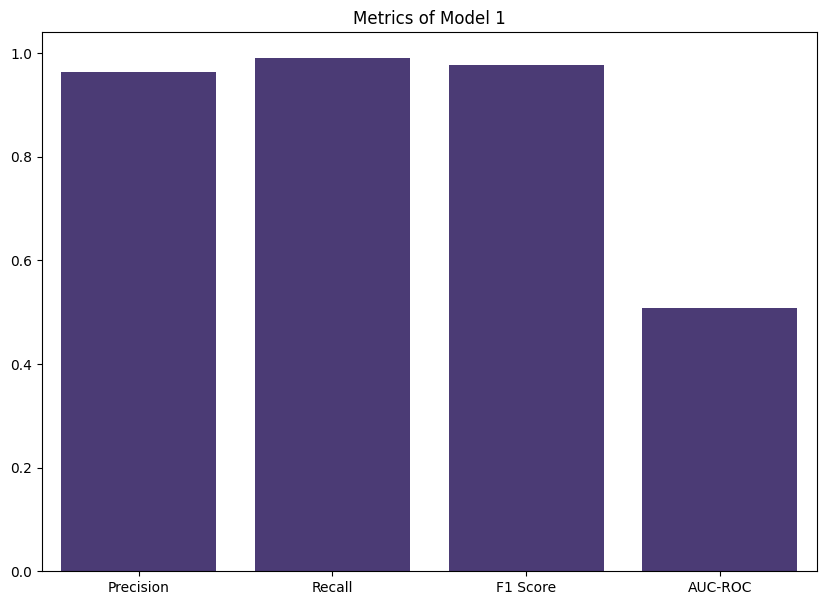

In [23]:
f.plot_metrics(m1_metrics, 'Model 1')

# Model 2

In [ ]:
# Define the parameter grid
m2_param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_samples': ['auto', 100, 128, 200, 256],
    'contamination': [0.01, 0.03, 0.05, 0.07, 0.1],
    'max_features': [1, 'auto']
}

# Fine tune the model
m2_best_params, m2_best_estimator = f.if_hypertune(m2_param_grid, X_train, y_train)

# Create model
m2 = IsolationForest(n_estimators=m2_best_params['n_estimators'],
                     max_samples=m2_best_params['max_samples'],
                     contamination=m2_best_params['contamination'],
                     random_state=42)

# Fit the model to your training data
m2.fit(X_train, y_train)
m2_pred = m2.predict(X_val)

## Evaluation

### Confusion Matrix

In [ ]:
m2_cm = f.get_cm(m2_pred, y_val)
f.cm_inf(m2_cm, 'Model 2')

Confusion Matrix for model Model 1:

True Positives: 112845
True Negatives: 111
False Positives: 4131
False Negatives: 1021


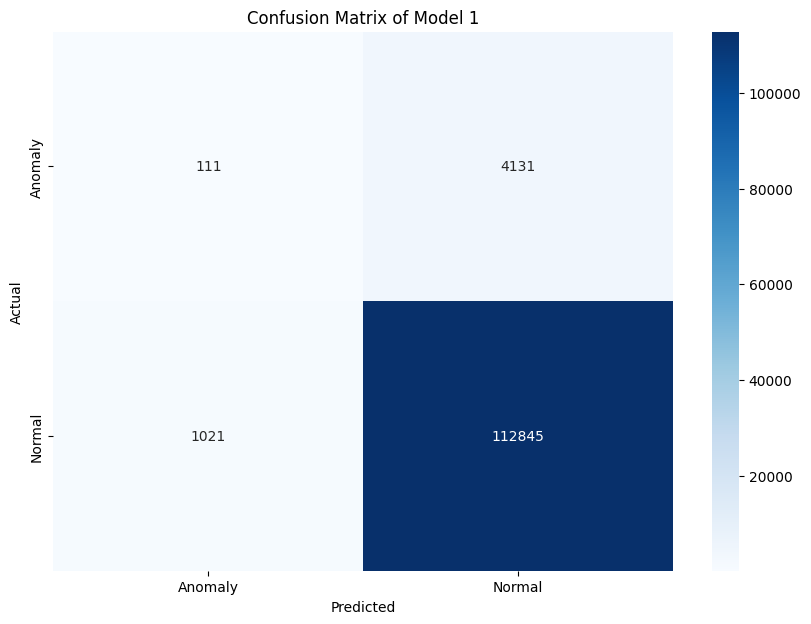

In [ ]:
f.plot_cm(m2_cm, 'Model 2')

### Classification Report

In [ ]:
# Print the classification report
print(classification_report(y_val_converted, m2_pred))

              precision    recall  f1-score   support

          -1       0.10      0.03      0.04      4242
           1       0.96      0.99      0.98    113866

    accuracy                           0.96    118108
   macro avg       0.53      0.51      0.51    118108
weighted avg       0.93      0.96      0.94    118108



### Metrics

In [ ]:
m2_metrics = f.get_metrics(y_val_converted, m2_pred)
f.print_metrics(m2_metrics, 'Model 2')

Metrics of Model 1:

Precision: 0.9646850636027903
Recall: 0.9910333198672123
F1 Score: 0.9776817043692222
AUC-ROC: 0.5086001111358692


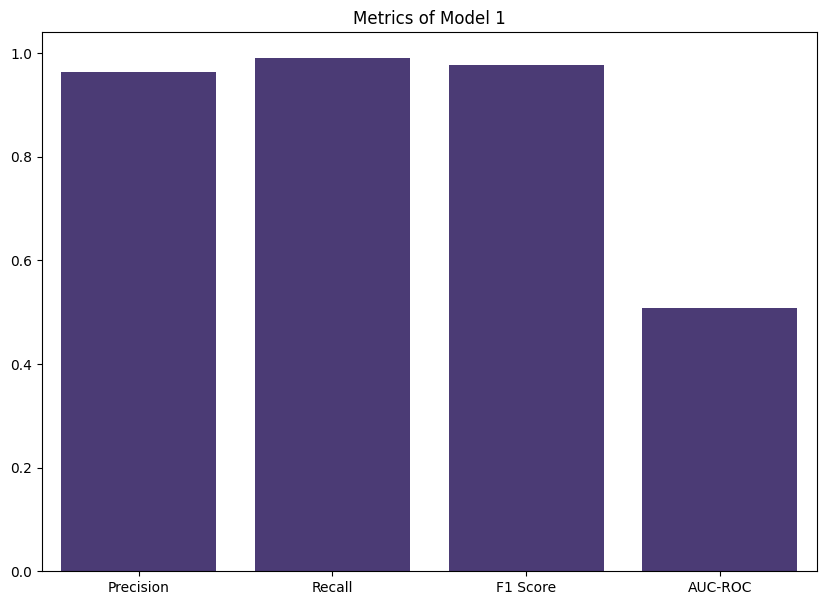

In [ ]:
f.plot_metrics(m2_metrics, 'Model 2')